In [1]:
import pandas as pd 
import glob 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
industry_list = pd.read_csv('emiten_and_industry_list.csv')

In [3]:
path = 'historical'
all_files = glob.glob(os.path.join(path, '*.csv'))

In [4]:
list_data = []
for filename in all_files:
    df = pd.read_csv(filename, usecols = ['Date', 'Close'])
    df['Name'] = os.path.basename(filename).replace('.csv', '')
    list_data.append(df)

In [5]:
prices = pd.concat(list_data, ignore_index=True)
prices['Date'] = pd.to_datetime(prices['Date'])
max_date = prices['Date'].max()
three_months_ago = max_date - pd.DateOffset(months=3)
prices = prices[prices['Date'] >= three_months_ago]

In [6]:
final = pd.merge(prices, industry_list, left_on='Name', right_on='Kode')
avg = final.groupby(['Date', 'Industri'])['Close'].mean().reset_index()
avg

,Date,Industri,Close
0,2025-10-02,Basic Materials,1049.676350
1,2025-10-02,Consumer Cyclicals,598.054086
2,2025-10-02,Consumer Non-Cyclicals,1442.059971
3,2025-10-02,Energy,2715.784016
4,2025-10-02,Financials,1385.717239
...,...,...,...
721,2026-01-02,Industrials,1376.523077
722,2026-01-02,Infrastructures,1988.342857
723,2026-01-02,Properties & Real Estate,1246.586957
724,2026-01-02,Technology,6531.893617


In [7]:
industries = avg['Industri'].unique()
n_industries = len(industries)

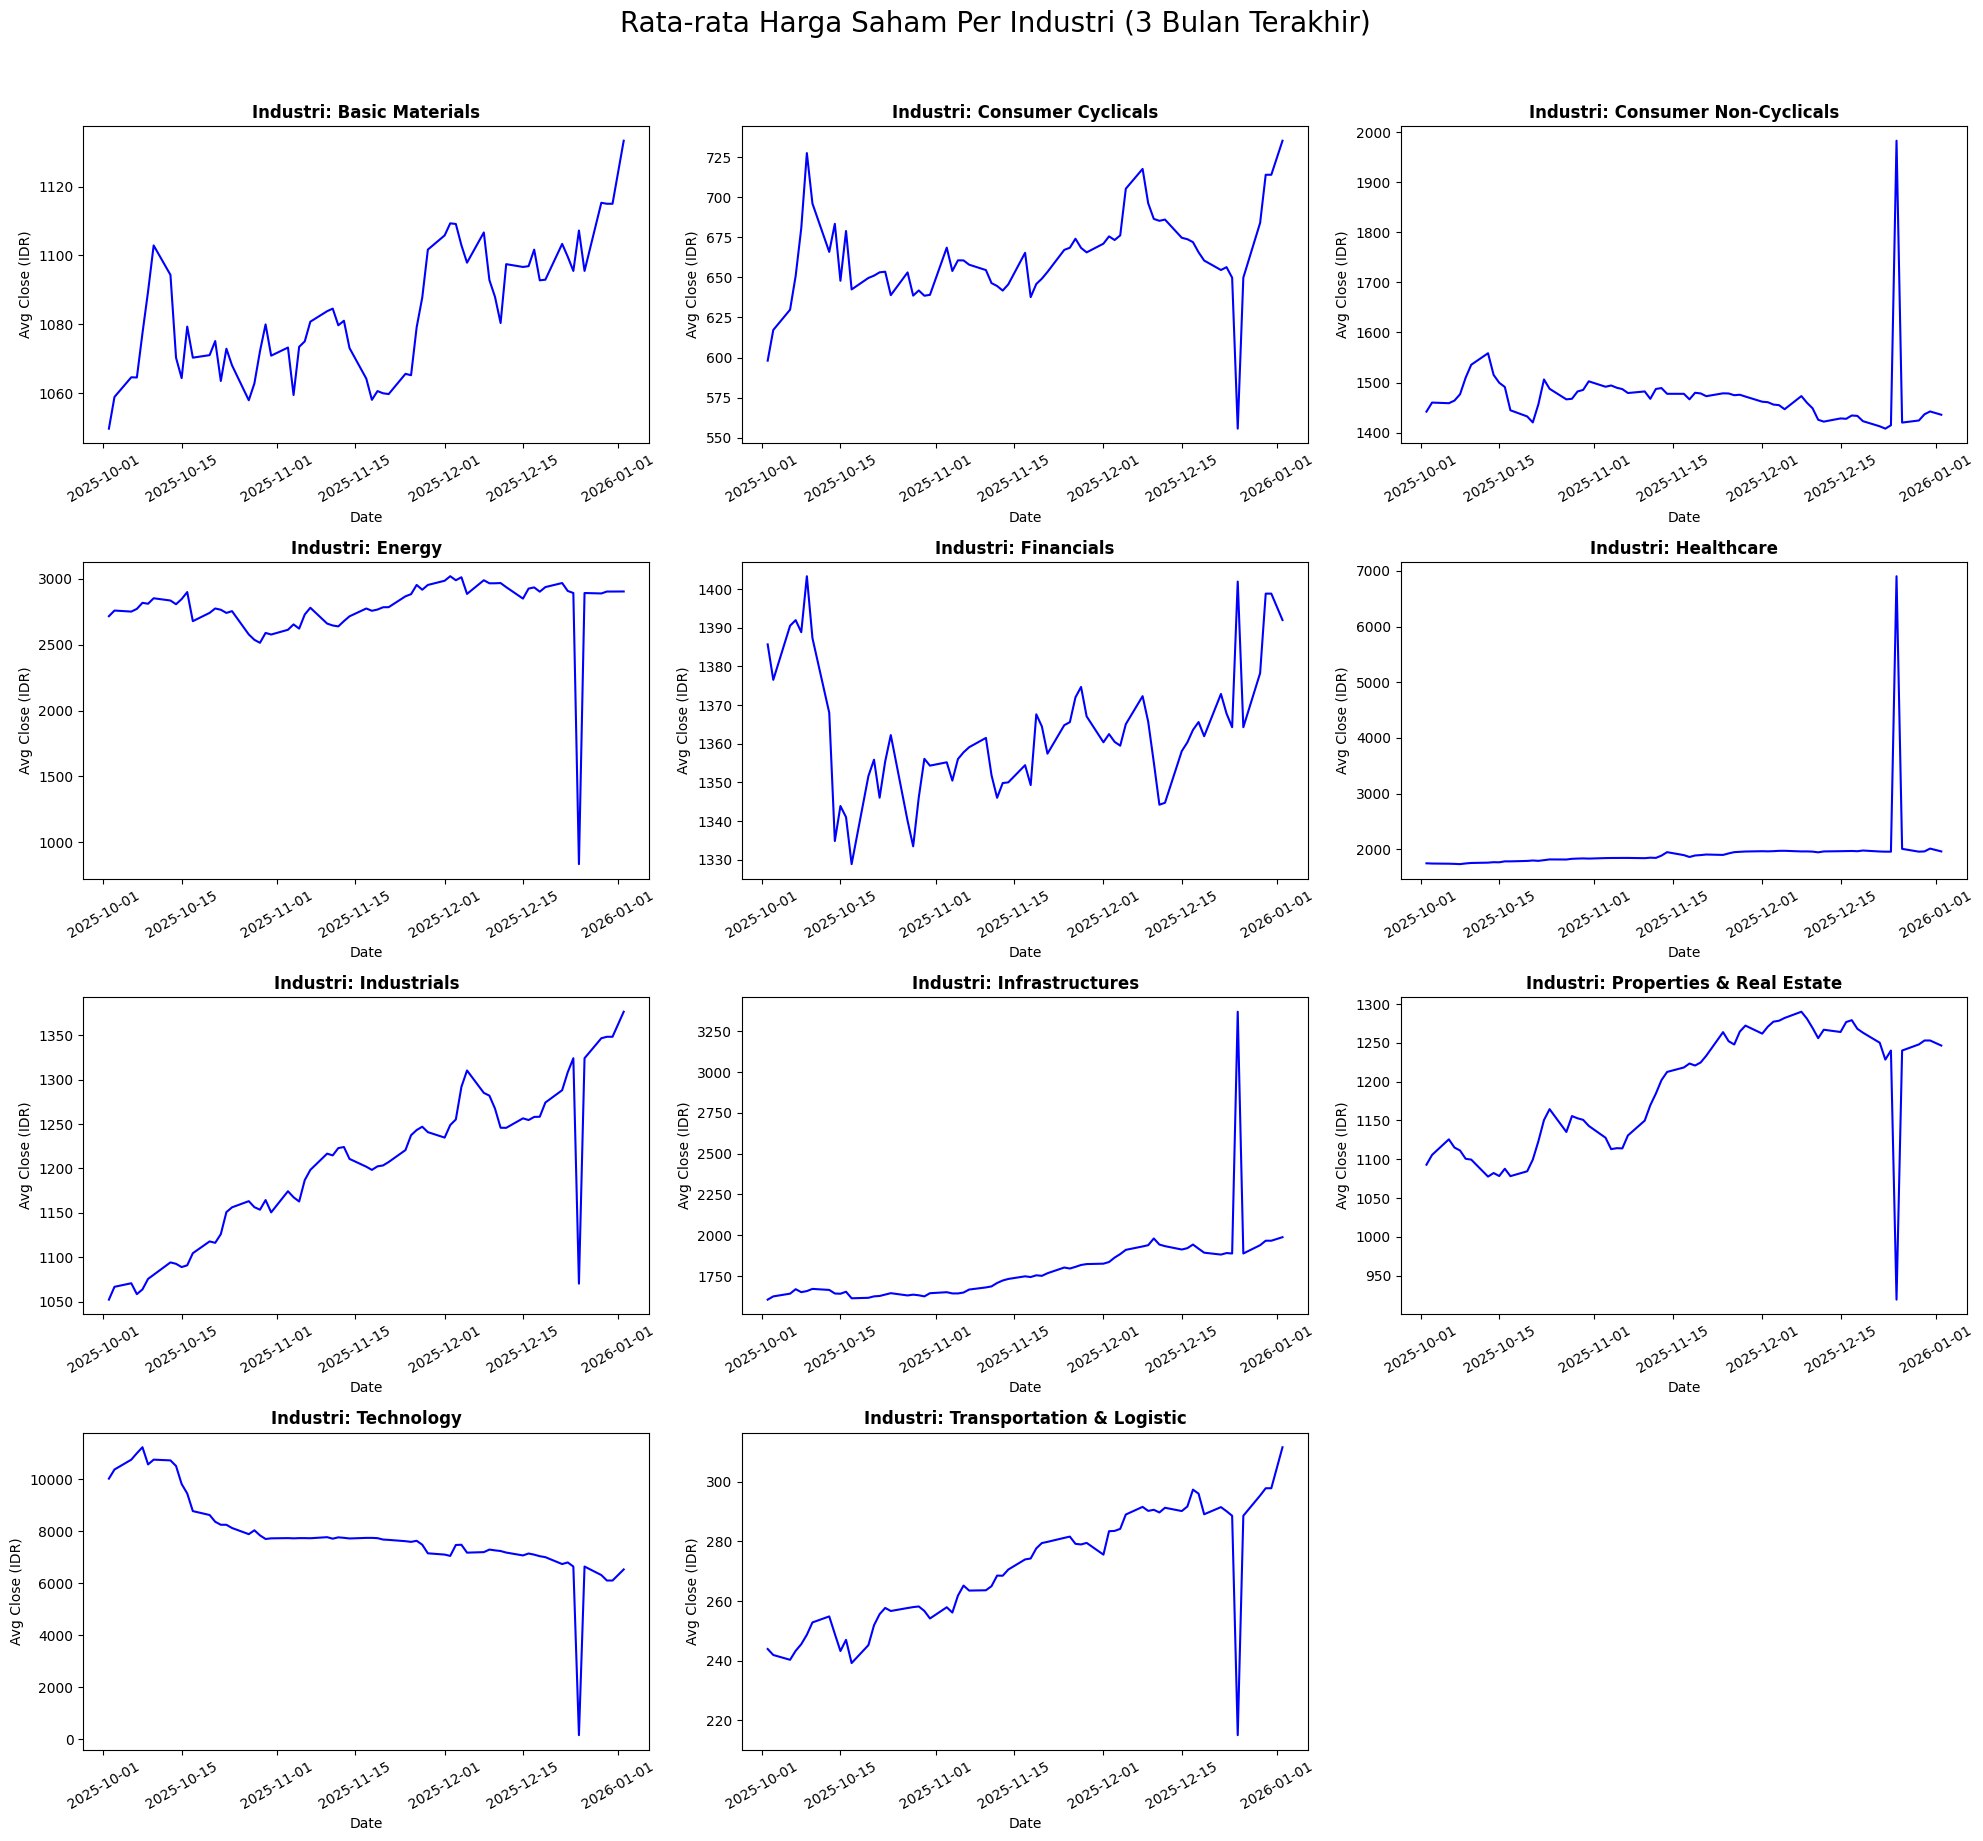

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))
axes = axes.flatten() 

for i, industry in enumerate(industries):
    data_plot = avg[avg['Industri'] == industry]
    
    sns.lineplot(ax=axes[i], data=data_plot, x='Date', y='Close', color='blue')
    
    axes[i].set_title(f'Industri: {industry}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Avg Close (IDR)')
    axes[i].tick_params(axis='x', rotation=30)

if n_industries < len(axes):
    for j in range(n_industries, len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Rata-rata Harga Saham Per Industri (3 Bulan Terakhir)', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()